# Assignment: Data Wrangling
### `! git clone https://github.com/ds4e/wrangling`
### Do Q1 and Q2, and either Q3 or Q4, for a total of 3 questions.

In [1]:
! git clone https://github.com/ds4e/wrangling

Cloning into 'wrangling'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 63 (delta 8), reused 5 (delta 5), pack-reused 45 (from 1)
Receiving objects: 100% (63/63), 13.84 MiB | 14.14 MiB/s, done.
Resolving deltas: 100% (14/14), done.


In [5]:
import numpy as np # Import the numpy package into your workspace
import matplotlib.pyplot as plt # Import matplotlib into your workspace
import pandas as pd  # Import the pandas package into your workspace

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

Q1 Part 1:

Numeric variable: For ./data/airbnb_hw.csv, clean the Price variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)

In [11]:
df = pd.read_csv('/content/wrangling/assignment/data/airbnb_hw.csv',low_memory=False)
df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


Explore the Price Variable

In [16]:
print(df['Price'].unique(),'\n') #they are strings because of the ","
print(df['Price'].value_counts(), '\n')
print(df['Price'].hist(), '\n')

['145' '37' '28' '199' '549' '149' '250' '90' '270' '290' '170' '59' '49'
 '68' '285' '75' '100' '150' '700' '125' '175' '40' '89' '95' '99' '499'
 '120' '79' '110' '180' '143' '230' '350' '135' '85' '60' '70' '55' '44'
 '200' '165' '115' '74' '84' '129' '50' '185' '80' '190' '140' '45' '65'
 '225' '600' '109' '1,990' '73' '240' '72' '105' '155' '160' '42' '132'
 '117' '295' '280' '159' '107' '69' '239' '220' '399' '130' '375' '585'
 '275' '139' '260' '35' '133' '300' '289' '179' '98' '195' '29' '27' '39'
 '249' '192' '142' '169' '1,000' '131' '138' '113' '122' '329' '101' '475'
 '238' '272' '308' '126' '235' '315' '248' '128' '56' '207' '450' '215'
 '210' '385' '445' '136' '247' '118' '77' '76' '92' '198' '205' '299'
 '222' '245' '104' '153' '349' '114' '320' '292' '226' '420' '500' '325'
 '307' '78' '265' '108' '123' '189' '32' '58' '86' '219' '800' '335' '63'
 '229' '425' '67' '87' '1,200' '158' '650' '234' '310' '695' '400' '166'
 '119' '62' '168' '340' '479' '43' '395' '144' '52' 

Convert Price Variable to Numeric

After coercion: 
 count    30297.000000
mean       153.357032
std        108.895698
min         10.000000
25%         80.000000
50%        125.000000
75%        192.000000
max        999.000000
Name: Price, dtype: float64 

Total Missings: 
 181 



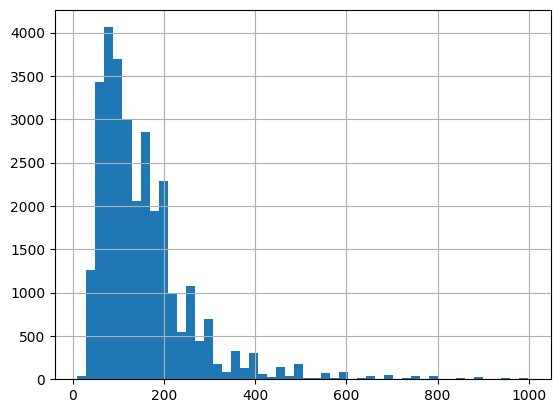

In [21]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce') # Coerce the variable to numeric
print('After coercion: \n', df['Price'].describe(),'\n') # Describe the numeric variable
df['Price'].hist(bins = 50) # Histogram of the variable values

Handle Missing Values by Creating a Dummy Variable

In [28]:
df['Price_nan'] = df['Price'].isnull() # Equals 1 if missing, 0 if non-null
print('Total Missings: \n', sum(df['Price_nan']),'\n') # How many missing values are there?
df['Price_nan'].value_counts() # 181 true observations for 181 missing values of 'Price'

Total Missings: 
 181 



,count
Price_nan,
False,30297
True,181


Q1, Part 2:

Categorical variable: For the Minnesota police use of for data, ./data/mn_police_use_of_force.csv, clean the subject_injury variable, handling the NA's; this gives a value Yes when a person was injured by police, and No when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned subject_injury variable with the force_type variable. Are there any patterns regarding when the data are missing?

In [40]:
police_df = pd.read_csv('/content/wrangling/assignment/data/mn_police_use_of_force.csv',low_memory=False)
print(police_df['subject_injury'].unique(), '\n')
police_df['subject_injury'] = police_df['subject_injury'].replace('',np.nan) # Notice the column replacement
print(police_df['subject_injury'].value_counts(), '\n')
print(police_df['subject_injury'])

[nan 'No' 'Yes'] 

subject_injury
Yes    1631
No     1446
Name: count, dtype: int64 

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
12920    NaN
12921    NaN
12922    NaN
12923    NaN
12924    NaN
Name: subject_injury, Length: 12925, dtype: object


In [49]:
#pd.crosstab(police_df['subject_injury'], police_df['force_type'])
police_df['injury_NA'] = police_df['subject_injury'].isnull()
pd.crosstab(police_df['injury_NA'],police_df['force_type'])
police_df['injury_NA'].value_counts() # there are 9849 missing values and only 3077 observations with values

,count
injury_NA,
True,9848
False,3077


Q1 Part 3:

Dummy variable: For the pretrial data covered in the lecture, clean the WhetherDefendantWasReleasedPretrial variable as well as you can, and, in particular, replace missing values with np.nan.

In [7]:
url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
trial_df = pd.read_csv(url,low_memory=False)
print(trial_df['WhetherDefendantWasReleasedPretrial'].unique())


[9 0 1]


Deal with missing values

In [8]:
trial_df['WhetherDefendantWasReleasedPretrial'] = trial_df ['WhetherDefendantWasReleasedPretrial'].replace( 9, np.nan)
print(trial_df['WhetherDefendantWasReleasedPretrial'].value_counts())

WhetherDefendantWasReleasedPretrial
1.0    19154
0.0     3801
Name: count, dtype: int64


In [9]:
print(trial_df['WhetherDefendantWasReleasedPretrial'].unique())

[nan  0.  1.]


In [10]:
print(trial_df['WhetherDefendantWasReleasedPretrial'])

0        NaN
1        0.0
2        0.0
3        0.0
4        1.0
        ... 
22981    1.0
22982    1.0
22983    1.0
22984    1.0
22985    1.0
Name: WhetherDefendantWasReleasedPretrial, Length: 22986, dtype: float64


Q1 Part 4:

Missing values, not at random: For the pretrial data covered in the lecture, clean the ImposedSentenceAllChargeInContactEvent variable as well as you can, and explain the choices you make. (Hint: Look at the SentenceTypeAllChargesAtConvictionInContactEvent variable.)

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

1. This paper is about the importance of working with tidy data. A lot of data is very messy, but using a tidy data method allows each dataset to have a similar structure - making the cleaning process easier and quicker. The paper argues that this is an under-studied aspect of data cleaning and we should spend more emphasis on common data structures and methods. The paper uses a case study to explain these ideas.

2. The tidy data standard intends to accomplish quicker and easier analysis of data by creating a standard way of organizing data in a dataset. With this standard, people can use common analysis tools quickly without having to start from scratch or get bogged down with the form of the data.

3. "Like families, tidy datasets are all alike but every messy dataset is messy in its own way."
Tidy datasets are all similar enough in structure like family members who share DNA - their structure and composition is the same, even if the data within the structure needs cleaning. However, messy datasets that are not tidy are completely different because they do not share this common structure/form - they do not have the same meaningful layout of information. "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
When looking at a specific dataset, it is very easy to determine what each variable is and what the associated observations are because 1. usually there is a meaningful visual layout and 2. the viewer has common sense and logic that allows them to understand the meaningful relationships between different entries in the data. In general, it is usually easier to point to an example of something than to explain it broadly - "You know it when you see it"

4. Values are either numbers or strings that belong to both a variable and an observation. For the "age" variable, "Timmy" (observation) has a value of 26.
Variables are categories of interest in our dataset that we want to measure across observations. Variables have values that provide the information about that attribute belonging to each observation.
Observations contain all the values that are measured in the same unit - a person, time, event, day, etc. When looking at a specific observation, you can see its values for each variable.
In an Excel sheet type of data structure, variables and observations exist on the outside, and values fill in the table.

5. A tidy dataset is defined by the way that meaning is established through the structure of the data - how rows, columns, and tables are matched with observations, variables, and types. Tidy data has a column for each variable, a row for each observation, and each type of observational unit forms a table.

6. The 5 most common problems with messy datasets are: column headers are values, not variable names; multiple variables are stored in one column; variables are stored in both rows and columns; multiple types of observational units are stored in the same table; and a single observational unit is stored in multiple tables.

The data in Table 4 are messy because there are values being used as variables. The income variable should be its own column with the values below it - then each religion and income pair is an observation with a certain frequency. Melting a dataset, also called stacking, is the process of turning columns into rows to ensure that each variable has its own column and each row represents an observation.

7. Table 11 has a column for each possible day of the month, resulting in missing values across the table. It is messy because day should represent an observation - aka for each day there is a value for each variable/category - so day should be its own column with d1, d2, d3, etc as values. Table 12 is tidy and molten because it transformed day to be observations part of the date column - now, for each variable and observation (for each day) there is a corresponding value and no empty areas.

8. The chicken and the egg problem is that tidy data and tidy tools depend on each other. If tidy data is only as useful as the tools we use with it, then tidy tools are linked to tidy data. Therefore, independently changing data structures or tools will not improve workflow if the corresponding structure or tool does not also adapt. Wickham hopes that others continue to establish tidy data practices and better tools, improving the standard for everyone.

**Q4.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?